In [8]:
# Load iris data from sklearn

from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
# Print out columns index of iris data

print(iris.feature_names)

In [ ]:
# Print iris names

print(iris.target_names)

In [ ]:
iris.target

In [ ]:
# Plot iris types across the width and length with different shapes and colors using matplotlib

import matplotlib.pyplot as plt

sentosa = (iris.target == 0)
versicolor = (iris.target == 1)
virginica = (iris.target == 2)

plt.scatter(iris.data[sentosa, 2], iris.data[sentosa, 3], marker='o', c='r')
plt.scatter(iris.data[versicolor, 2], iris.data[versicolor, 3], marker='s', c='olive')
# plt.scatter(iris.data[virginica, 2], iris.data[virginica, 3], marker='o', c='g')






In [9]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import datasets


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
svm_clf.predict([[5.5, 1.7]])

In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import numpy as np

from sklearn.svm import LinearSVR


In [4]:
X,y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVR(epsilon=1.5))
])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVR(epsilon=1.5))])

In [5]:
clf = polynomial_svm_clf.named_steps["svm_clf"]

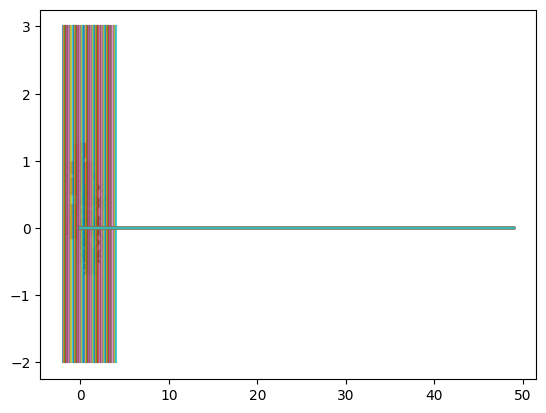

In [12]:
# create a meshgrid of points spanning the range of the data
# The first argument is X axis, the second argument is Y axis
# The shape of linespace represent the start and end of the axis
# It have to completely cover the range of data
# The amount of data will decide how smooth the curve is, 200 is a good number
xx, yy = np.meshgrid(np.linspace(-2, 4).reshape(-1, 1),
                      np.linspace(-2, 3).reshape(-1, 1))

# use the SVM classifier to predict the class of each point on the meshgrid
# Lets say the xx and yy are 100 points each, Z will be 10,000 points
Z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the decision boundary and the training data
plt.plot(xx, yy, Z, alpha=0.8)

# plot the data points on top of the decision boundary 
plt.scatter(X[y==0,0],X[y==0,1], c='red', marker='s')
plt.scatter(X[y==1,0],X[y==1,1], c='green', marker='x')

In [67]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
		('scaler', StandardScaler()),
		('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
	])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

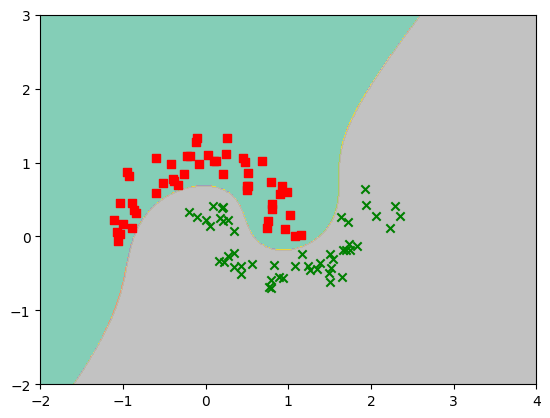

In [68]:
# create a meshgrid of points spanning the range of the data
# The first argument is X axis, the second argument is Y axis
# The shape of linespace represent the start and end of the axis
# It have to completely cover the range of data
# The amount of data will decide how smooth the curve is, 200 is a good number
xx, yy = np.meshgrid(np.linspace(-2, 4, 500).reshape(-1, 1),
                      np.linspace(-2, 3, 500).reshape(-1, 1))

# use the SVM classifier to predict the class of each point on the meshgrid
# Lets say the xx and yy are 100 points each, Z will be 10,000 points
Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the decision boundary and the training data
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Set2')

# plot the data points on top of the decision boundary 
plt.scatter(X[y==0,0],X[y==0,1], c='red', marker='s')
plt.scatter(X[y==1,0],X[y==1,1], c='green', marker='x')

In [15]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=5))])

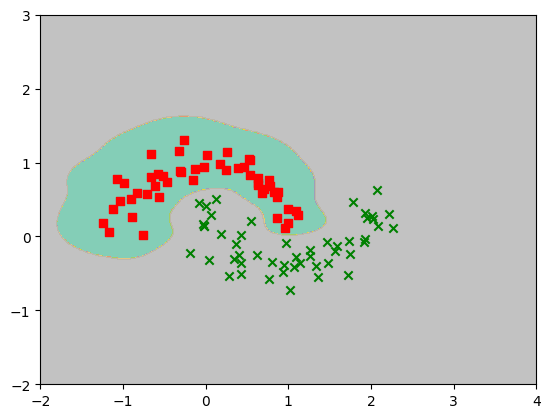

In [16]:
# create a meshgrid of points spanning the range of the data
# The first argument is X axis, the second argument is Y axis
# The shape of linespace represent the start and end of the axis
# It have to completely cover the range of data
# The amount of data will decide how smooth the curve is, 200 is a good number
xx, yy = np.meshgrid(np.linspace(-2, 4, 500).reshape(-1, 1),
                      np.linspace(-2, 3, 500).reshape(-1, 1))

# use the SVM classifier to predict the class of each point on the meshgrid
# Lets say the xx and yy are 100 points each, Z will be 10,000 points
Z = rbf_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the decision boundary and the training data
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Set2')

# plot the data points on top of the decision boundary 
plt.scatter(X[y==0,0],X[y==0,1], c='red', marker='s')
plt.scatter(X[y==1,0],X[y==1,1], c='green', marker='x')